In [1]:
import numpy as np
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
%matplotlib inline
import os
import geopandas as gpd
from mpl_toolkits.mplot3d import Axes3D

EPSG:31370


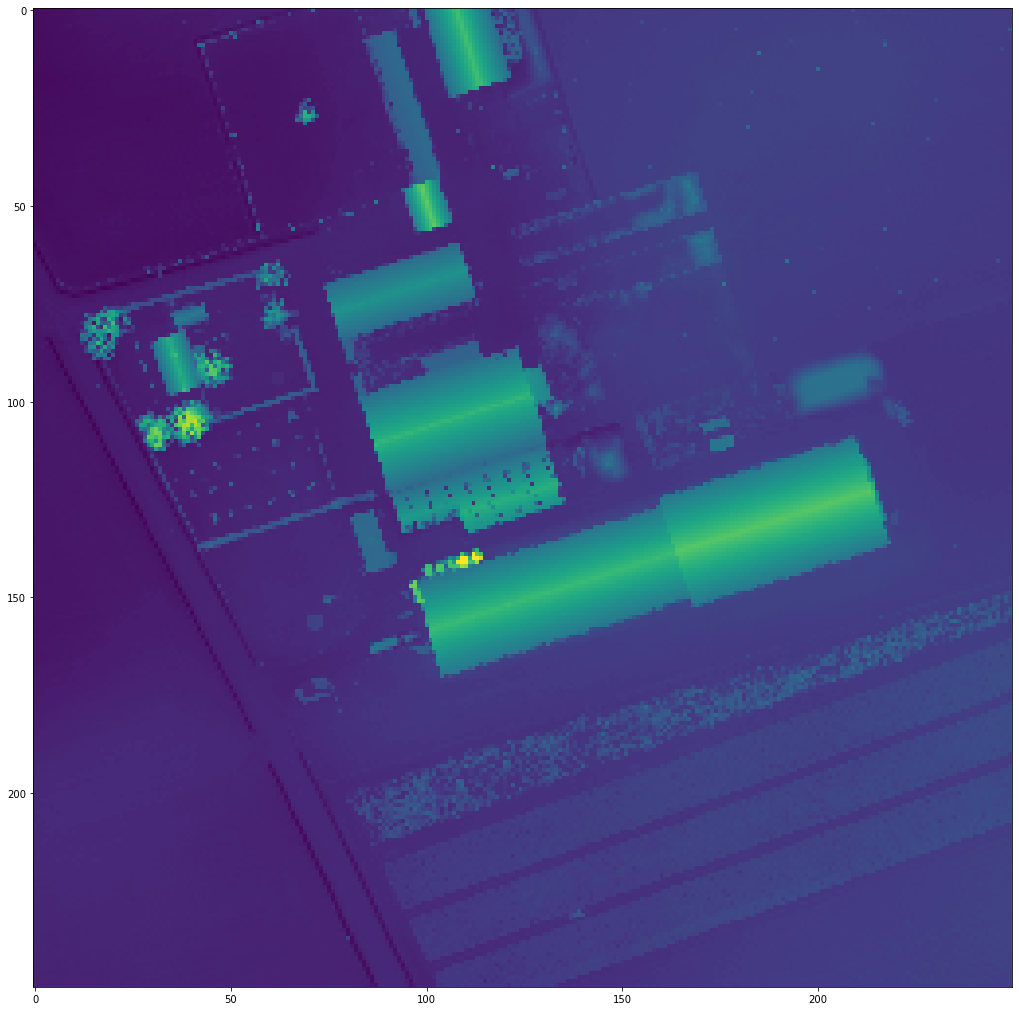

In [10]:
window = rasterio.windows.Window(10750,6550,250,250)

#crop DSM array
with rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif') as src:
    subset = src.read(1, window=window)
    out_meta = src.meta
    count = src.count
out_meta.update({"driver": "GTiff",
             "height": subset.shape[0],
             "width": subset.shape[1]})

# write cropped DSM array
with rasterio.open("DSM_k01.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(subset,1)
    
plt.figure(figsize=(18,18))
plt.imshow(subset)

#crop DTM array
with rasterio.open('Data/DTM_Data/DHMVIIDTMRAS1m_k01.tif') as src:
    subset = src.read(1, window=window)
    out_meta = src.meta
    count = src.count
out_meta.update({"driver": "GTiff",
             "height": subset.shape[0],
             "width": subset.shape[1]})

# write cropped DSM array
with rasterio.open("DTM_k01.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(subset,1)

    
DSM_img = rasterio.open('DSM_k01.byte.masked.tif', masked=True)
DSM_arr = DSM_img.read()
print(DSM_img.crs)
DTM_img = rasterio.open('DTM_k01.byte.masked.tif', masked=True)
DTM_arr = DTM_img.read()

CHM_arr = DSM_arr - DTM_arr
# CHM_arr.shape

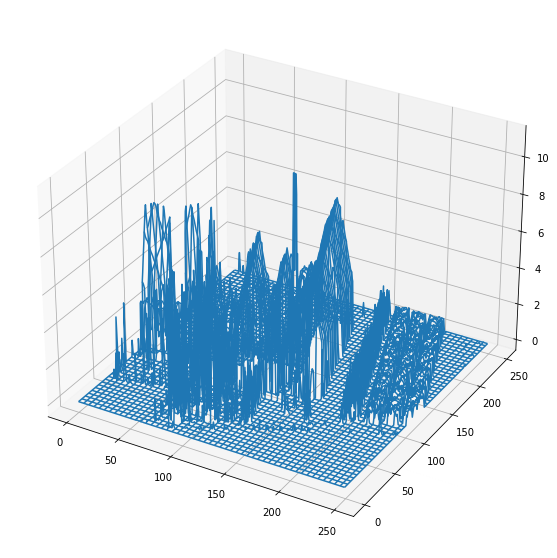

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate

x= range(250)
y = range (250)
x,y = np.meshgrid(x, y, indexing='ij')

z = CHM_arr[0]

# xnew, ynew = np.mgrid[range(250), range(250)]
# tck = interpolate.bisplrep(x, y, z, s=0)
# znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

z.shape
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
# ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)
# plt.figure()
# plt.scatter(x, y, z)
plt.show()

In [24]:
address ='celestijnenlaan 9, 3001 heverlee'
df = gp.tools.geocode(address)


,geometry,address
0,POINT (4.67443 50.87211),"9, Celestijnenlaan, 3001, Celestijnenlaan, Leu..."


In [11]:
#Read Shape files
shape_df = gpd.read_file('Data/DSM_Data/DHMVII_vdc_k01/DHMVII_vdc_k01.shp')
x0 = shape_df.loc[1, 'geometry']
x0
shape_df.crs
print(shape_df.crs)
# shape_df.head()

# shape_df.plot()
# plt.show()

PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",49.8333339],PARAMETER["standard_parallel_2",51.1666672333333],PARAMETER["false_easting",150000.01256],PARAMETER["false_northing",5400088.4378],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [13]:
######
import mayavi
from mayavi import mlab

mlab.figure(size=(250, 250), bgcolor=(0.16, 0.28, 0.46))

mlab.surf(CHM_arr, warp_scale=0.2) 
mlab.show()



ModuleNotFoundError: No module named 'mayavi'

In [45]:
x

In [10]:
DTM_arr.shape
crs = DTM_img.crs
print(crs)

EPSG:31370


[[[-9.999e+03 -9.999e+03 -9.999e+03 ...  1.275e+01  1.279e+01  1.280e+01]
  [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.280e+01  1.281e+01  1.284e+01]
  [-9.999e+03 -9.999e+03 -9.999e+03 ...  1.284e+01  1.283e+01  1.288e+01]
  ...
  [ 4.520e+00  4.550e+00  4.570e+00 ...  1.680e+01  1.693e+01  1.690e+01]
  [ 4.490e+00  4.570e+00  4.580e+00 ...  1.691e+01  1.691e+01  1.693e+01]
  [ 4.480e+00  4.550e+00  4.570e+00 ...  1.686e+01  1.688e+01  1.690e+01]]]


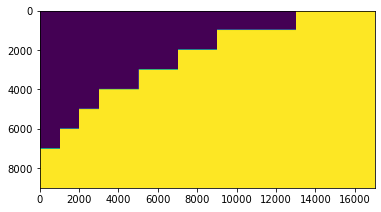

<AxesSubplot:>

In [25]:
print(DTM_arr)


In [3]:
DSM_img = rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif', masked=True)
DSM_arr = DSM_img.read()

# How many bands does this image have?
num_bands = DSM_img.count
print('Number of bands in image: {n}\n'.format(n=num_bands))
DSM_img.bounds   
# show(DTM_img)

Number of bands in image: 1



BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [20]:
DSM_img.transform

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [5]:
print(DTM_arr.min(), DTM_arr.max())
DTM_arr.shape

-9999.0 33.27


(1, 9000, 17000)

In [5]:
DBM_arr = DSM_arr - DTM_arr
DBM_arr
DBM_arr.min()
DBM_arr.max()



91.4532

In [5]:
DBM_arr.shape

(1, 9000, 17000)

In [ ]:
import pandas as pd
df = pd.DataFrame(data=DBM_arr[0])
f, ax = plt.subplots()
df.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values in the CHM Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

In [20]:
# fileDir = os.path.dirname(os.path.realpath('__file__'))
# print(fileDir) 
with rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif') as img:   
    # print(img)
    print(img.width, img.height)     
    # show(img)

17000 9000


In [15]:
# with rasterio.drivers():

    # Read raster bands directly to Numpy arrays.
    #
with rasterio.open('Data/DSM_Data/DHMVIIDSMRAS1m_k01.tif') as src:
    x = 800 #(src.bounds.left + src.bounds.right) / 2
    y = 16000 #(src.bounds.bottom + src.bounds.top) / 2
    for val in src.sample([(x, y)]):
        print(val)

[14.59]
